Shape of x_train: (1799, 2)
Shape of y_train: (1799,)
Shape of x_test: (2700, 2)
Shape of y_test: (2700,)
Predicted Prices for Next Year:
 [23004.027 23365.94  15880.206 ... 31009.479 26495.787 24973.479]


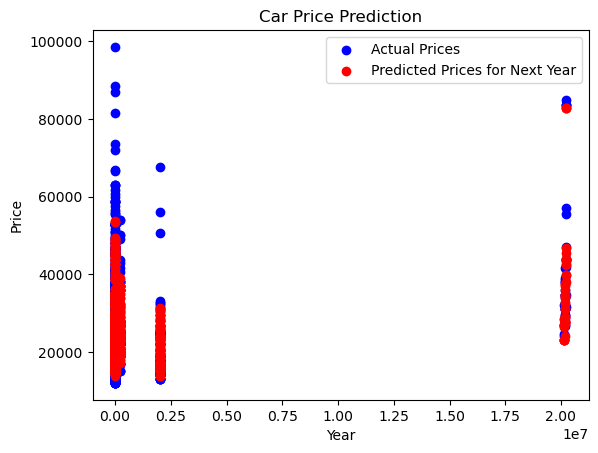

R2 score is  36.01483414546552 %


In [11]:
# Linear Regression
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

# Load data
data_set = pd.read_csv('carvana1.csv')

# Pick columns for X and y
X = data_set[['Year', 'Miles']].values  # Features: Year and Miles
y = data_set['Price'].values  # Target: Price

# Create a new feature for the next year
next_year = np.array([[year + 1, miles] for year, miles in X])

# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

# Check shapes after splitting
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


# Create an instance of linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Fit the model to the training data
regressor.fit(x_train, y_train)

# Make predictions
predicted_price_next_year = regressor.predict(next_year)
# Display the predicted prices for the next year
print("Predicted Prices for Next Year:\n", predicted_price_next_year)



# Visualizing the Training set results
plt.scatter(X[:, 0], y, color='blue', label='Actual Prices')  # Actual prices
plt.scatter(next_year[:, 0], predicted_price_next_year, color='red', label='Predicted Prices for Next Year')  # Predicted prices
plt.title('Car Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate and print R2 score
from sklearn.metrics import r2_score
y_pred = regressor.predict(x_test)
score = r2_score(y_test, y_pred)
print("R2 score is ", score * 100, "%")

 

Prediction Result
     Actual Y_Test  Prediction Data
0            20590            21893
1            22990            24590
2            18990            18990
3            16590            16590
4            15590            15590
5            14990            14990
6            17990            27590
7            23590            23590
8            23990            23990
9            16990            16990
10           14990            14990
11           34590            16990
12           24990            24990
13           24590            24590
14           20429            21990
15           22990            22990
16           18990            15990
17           41990            21990
18           14990            14990
19           24990            24990
20           20590            19990
21           23590            20990
22           18990            18990
23           12990            14990
24           40590            41990
25           17590            22990
26        

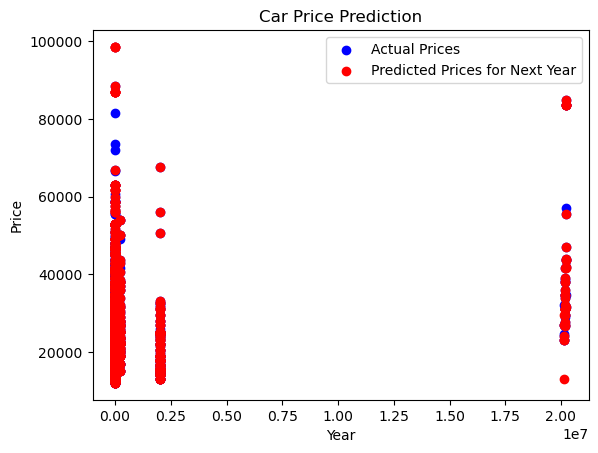

Accuracy: 53.33


In [17]:
# Decision Trees
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import AdaBoostClassifier 
import pandas as pd 
from sklearn import metrics 


# Load data
data_set = pd.read_csv('carvana1.csv')

# Pick columns for X and y
X = data_set[['Year', 'Miles']].values  # Features: Year and Miles
y = data_set['Price'].values  # Target: Price

# Create a new feature for the next year
next_year = np.array([[year + 1, miles] for year, miles in X])

# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.12
, random_state=0)
model = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test) 
# Create the decision tree model
# For classification:
#model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0) 
# Fit the model to the training data
classifier.fit(x_train, y_train)

#Fitting Decision Tree classifier to the training set 
from sklearn.tree import DecisionTreeClassifier 

classifier.fit(x_train, y_train) 
 
#Predicting the test set result 
y_pred= classifier.predict(x_test) 
df2=pd.DataFrame({"Actual Y_Test":y_test,"Prediction Data":y_pred}) 
print("Prediction Result") 
print(df2.to_string()) 
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# Make predictions
predicted_price_next_year = classifier.predict(next_year)
# Display the predicted prices for the next year
print("Predicted Prices for Next Year:\n", predicted_price_next_year)

# Visualizing the Training set results
plt.scatter(X[:, 0], y, color='blue', label='Actual Prices')  # Actual prices
plt.scatter(next_year[:, 0], predicted_price_next_year, color='red', label='Predicted Prices for Next Year')  # Predicted prices
plt.title('Car Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy: %.2f' % (accuracy*100))


In [19]:
# importing libraries 
import numpy as np 
import matplotlib.pyplot as mtp 
import pandas as pd 
#importing datasets 
data_set= pd.read_csv('User_Data.csv') 
df=pd.DataFrame(data_set) 
print("Actual Dataset") 
print(df.to_string()) 
 
#Extracting Independent and dependent Variable 
x= data_set.iloc[:, [2,3]].values 
y= data_set.iloc[:, 4].values 
 
 
# Splitting the dataset into training and test set. 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, 
random_state=0) 
 
#feature Scaling 
from sklearn.preprocessing import StandardScaler 
st_x= StandardScaler() 
x_train= st_x.fit_transform(x_train) 
x_test= st_x.transform(x_test) 
 
#Fitting Decision Tree classifier to the training set 
from sklearn.ensemble import RandomForestClassifier 
classifier= RandomForestClassifier(n_estimators= 10, 
criterion="entropy") 
 
classifier.fit(x_train, y_train) 
#Predicting the test set result 
y_pred= classifier.predict(x_test) 
print("------------PREDICTION----------") 
df2=pd.DataFrame({"Actual Result-Y":y_test,"Prediction Result":y_pred}) 
print(df2.to_string()) 
 
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, 
y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, 
y_pred)) 
print('Root Mean Squared Error:', 
np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
 
from sklearn.metrics import accuracy_score 
# evaluate predictions 
accuracy = accuracy_score(y_test, y_pred) 
print('Accuracy: %.2f' % (accuracy*100))

Actual Dataset
      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47            25000       